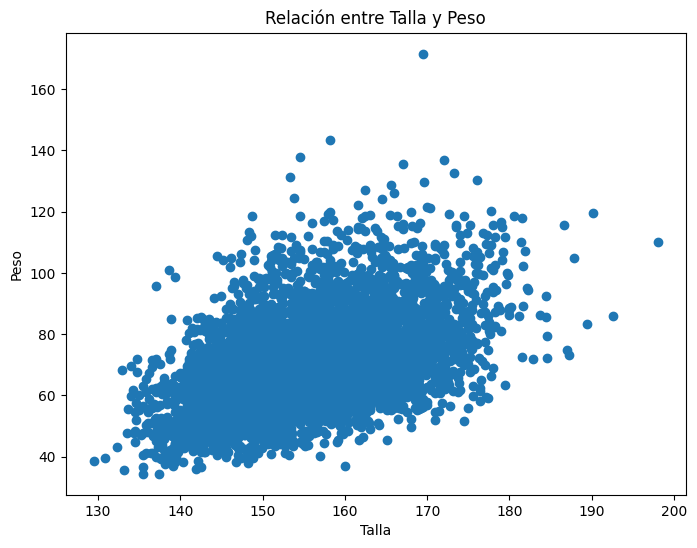

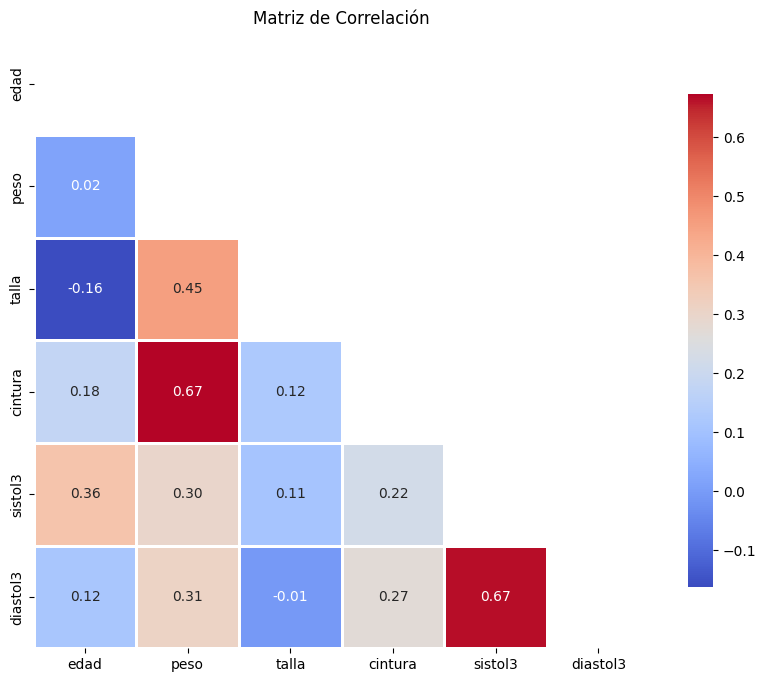


Matriz de correlación:
              edad      peso     talla   cintura   sistol3  diastol3
edad      1.000000  0.016319 -0.161868  0.177968  0.362528  0.115055
peso      0.016319  1.000000  0.453825  0.673255  0.297230  0.309902
talla    -0.161868  0.453825  1.000000  0.124852  0.108026 -0.007514
cintura   0.177968  0.673255  0.124852  1.000000  0.221055  0.271562
sistol3   0.362528  0.297230  0.108026  0.221055  1.000000  0.665598
diastol3  0.115055  0.309902 -0.007514  0.271562  0.665598  1.000000


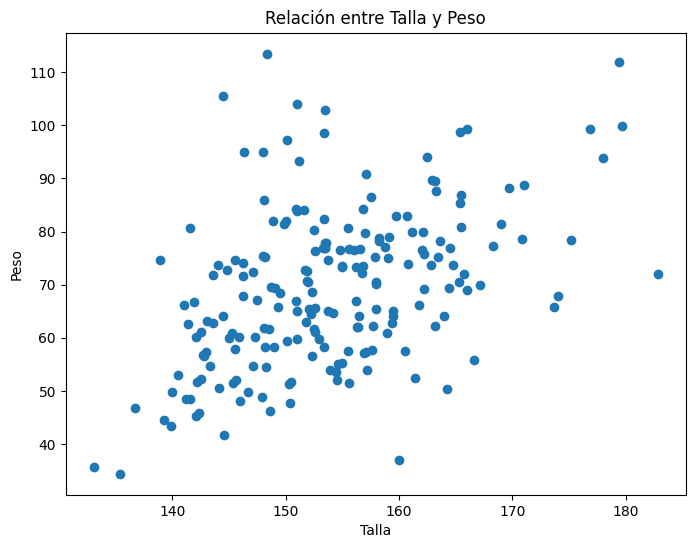

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Leer el archivo Excel
Data1 = pd.read_excel("EnsanutMediciones.xls")

# Cambia a numeric las columnas edad, talla, peso, cintura, sistol3, diastol3
cols_to_numeric = ['edad', 'talla', 'peso', 'cintura', 'sistol3', 'diastol3', 'sexo']
for col in cols_to_numeric:
    Data1[col] = pd.to_numeric(Data1[col], errors='coerce')

Data1 = Data1.dropna(subset=cols_to_numeric)

# Filtrar datos
Data2 = Data1[
    (Data1['edad'] >= 25) & 
    (Data1['edad'] <= 65) & 
    (Data1['talla'] != 222.2) &
    (Data1['peso'] != 222.22) & 
    (Data1['cintura'] != 222.22) & 
    (Data1['sistol3'] != 222.22) & 
    (Data1['diastol3'] != 222.22) &
    (Data1['talla'] > 120)
][['sexo', 'edad', 'peso', 'talla', 'cintura', 'sistol3', 'diastol3']].copy()

plt.figure(figsize=(8, 6))
plt.scatter(Data2['talla'], Data2['peso'])
plt.xlabel('Talla')
plt.ylabel('Peso')
plt.title('Relación entre Talla y Peso')
plt.show()

# Una muestra de 200
np.random.seed(1)
Data2 = Data2.sample(n=200, random_state=1).reset_index(drop=True)

# Convertir sexo a variable categórica (dummy)
Data2['sexo'] = Data2['sexo'].astype('category')

# Seleccionar únicamente las columnas numéricas
Data2_num = Data2.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
M = Data2_num.corr()

# Mostrar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(M, dtype=bool))
sns.heatmap(M, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación')
plt.show()

print("\nMatriz de correlación:")
print(M)

plt.figure(figsize=(8, 6))
plt.scatter(Data2['talla'], Data2['peso'])
plt.xlabel('Talla')
plt.ylabel('Peso')
plt.title('Relación entre Talla y Peso')
plt.show()

Interpretar este primer análisis descriptivo, porque fue necesario tomar una muestra? qué le dice la matriz de correlación?


In [24]:
Data2.head()
Data2_modelo = pd.get_dummies(Data2, columns=['sexo'], drop_first=True)
Data2_modelo.head()
Data2_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   edad      200 non-null    int64  
 1   peso      200 non-null    float64
 2   talla     200 non-null    float64
 3   cintura   200 non-null    float64
 4   sistol3   200 non-null    float64
 5   diastol3  200 non-null    float64
 6   sexo_2    200 non-null    bool   
dtypes: bool(1), float64(5), int64(1)
memory usage: 9.7 KB


Coeficientes del modelo:
Intercepto: -127.55735897478569
talla: 0.8037903481955936
cintura: 0.5478682628000417
edad: -0.08549656444771134
sistol3: 0.07938974202847889
diastol3: 0.13392852765733743
sexo_2: 6.255529125568776

R²: 0.6404485689364459
R² ajustado: 0.6292708042401696


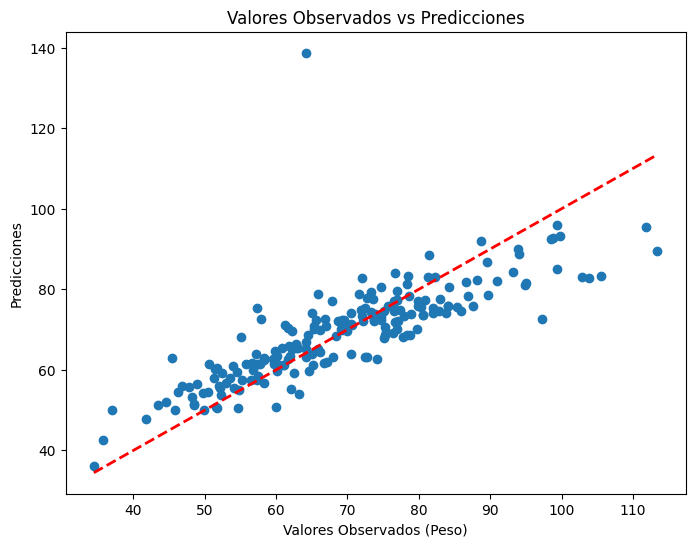

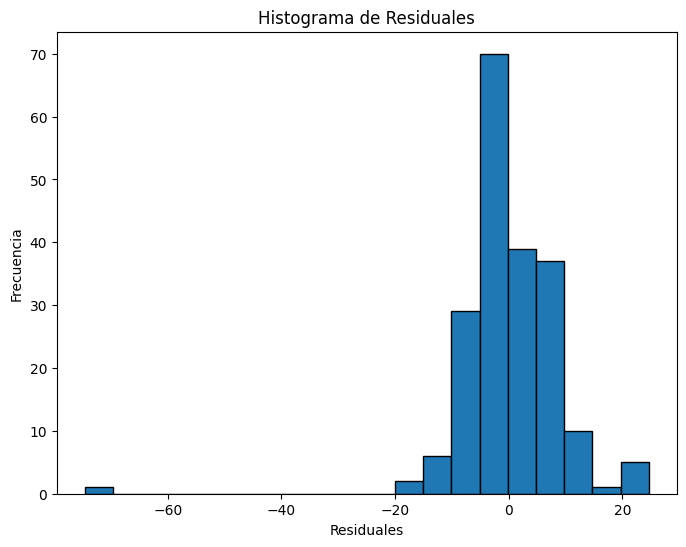


Error cuadrático medio (MSE): 81.60855524384215
Raíz del error cuadrático medio (RMSE): 9.033745360803687

Estadísticos t y valores p:
talla: t = 24.6193, p = 0.0000
cintura: t = 12.3833, p = 0.0000
edad: t = -1.3597, p = 0.1755
sistol3: t = 1.6615, p = 0.0982
diastol3: t = 1.7313, p = 0.0850
sexo_2: t = 4.5601, p = 0.0000


In [25]:
# Modelo completo con todas las posibles variables relacionadas con el peso
# Crear variables dummy para sexo
Data2_modelo = pd.get_dummies(Data2, columns=['sexo'], drop_first=True)

# Definir variables predictoras y variable objetivo
X = Data2_modelo[['talla', 'cintura', 'edad', 'sistol3', 'diastol3', 'sexo_2']].astype(float)
y = Data2_modelo['peso']

# Ajustar el modelo
m1 = LinearRegression()
m1.fit(X, y)

# Resumen del modelo
print("Coeficientes del modelo:")
print(f"Intercepto: {m1.intercept_}")
for i, col in enumerate(X.columns):
    print(f"{col}: {m1.coef_[i]}")

# R² del modelo
r2 = m1.score(X, y)
n = len(y)
p = X.shape[1]
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"\nR²: {r2}")
print(f"R² ajustado: {r2_adj}")

# Predicciones
predicciones = m1.predict(X)

# Gráfico de valores observados vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y, predicciones)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Observados (Peso)')
plt.ylabel('Predicciones')
plt.title('Valores Observados vs Predicciones')
plt.show()

# Residuales
residuos = y - predicciones

plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=20, edgecolor='black')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales')
plt.show()

# Estadísticos adicionales
sse = np.sum(residuos**2)
mse = sse / (n - p - 1)
rmse = np.sqrt(mse)
print(f"\nError cuadrático medio (MSE): {mse}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse}")

# Calcular estadísticos t y valores p para cada coeficiente
se = np.sqrt(mse)
var_coef = mse * np.linalg.inv(X.T @ X).diagonal()
se_coef = np.sqrt(var_coef)
t_stats = m1.coef_ / se_coef
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), n - p - 1))

print("\nEstadísticos t y valores p:")
for i, col in enumerate(X.columns):
    print(f"{col}: t = {t_stats[i]:.4f}, p = {p_values[i]:.4f}")

DAKLJFSKJGFLKJGAG

#Qué se observa de destacado al ajustar:
Interpretar el modelo, su calidad de ajuste y lo que observa con los residuales

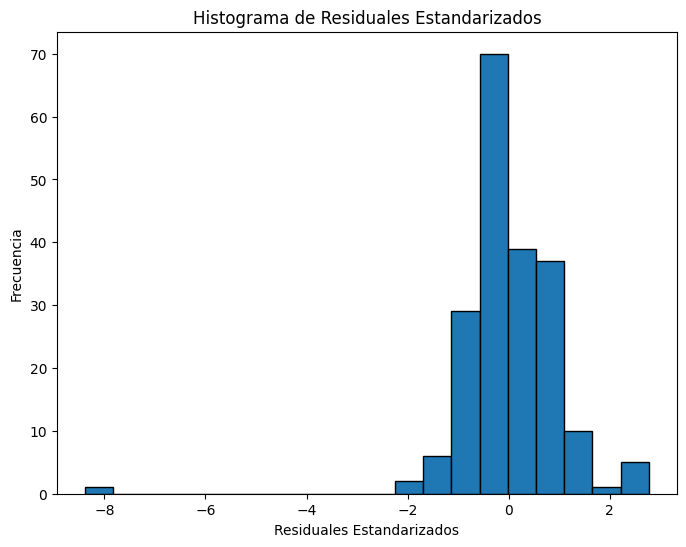

Outliers encontrados en las posiciones: [28]
Número de outliers: 1

Modelo 2 (sin outliers):
Intercepto: -120.2656913303823
talla: 0.6524731962866157
cintura: 0.9374129351605386
edad: -0.13786005787909575
sistol3: 0.046170237318786514
diastol3: -0.027501018800088296
sexo_2: 2.1363826687102767

R²: 0.8573074840315662
R² ajustado: 0.8528483429075526


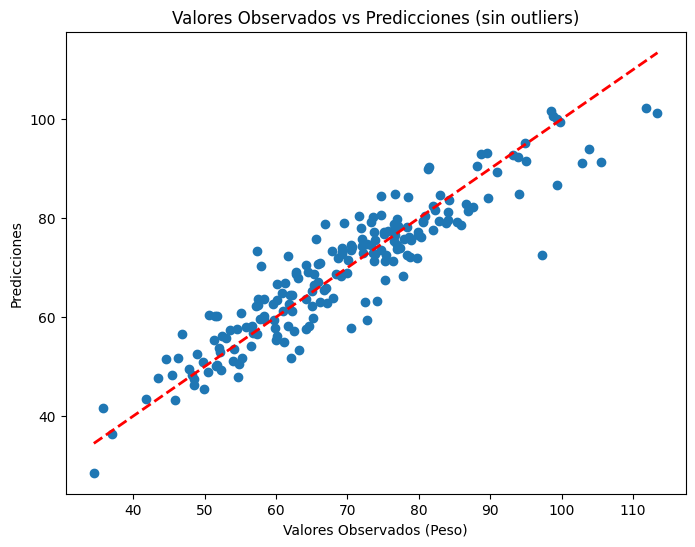

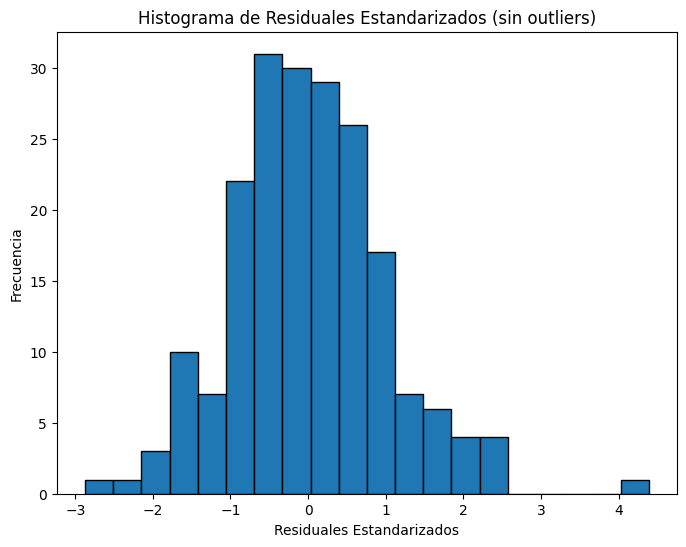

In [26]:
# Eliminar residuales atípicos, para ello se estandarizan
residuos_est = residuos / np.std(residuos, ddof=1)

plt.figure(figsize=(8, 6))
plt.hist(residuos_est, bins=20, edgecolor='black')
plt.xlabel('Residuales Estandarizados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales Estandarizados')
plt.show()

# Identificar outliers
outliers = np.where(np.abs(residuos_est) > 3.0)[0]
print(f"Outliers encontrados en las posiciones: {outliers}")
print(f"Número de outliers: {len(outliers)}")

# Crear dataset sin outliers
Data2b = Data2_modelo.drop(outliers).reset_index(drop=True)

# Modelo completo ajustado a los datos sin outliers
X2 = Data2b[['talla', 'cintura', 'edad', 'sistol3', 'diastol3', 'sexo_2']]
y2 = Data2b['peso']

m2 = LinearRegression()
m2.fit(X2, y2)

# Resumen del modelo 2
print("\nModelo 2 (sin outliers):")
print(f"Intercepto: {m2.intercept_}")
for i, col in enumerate(X2.columns):
    print(f"{col}: {m2.coef_[i]}")

r2_2 = m2.score(X2, y2)
n2 = len(y2)
p2 = X2.shape[1]
r2_adj_2 = 1 - (1 - r2_2) * (n2 - 1) / (n2 - p2 - 1)
print(f"\nR²: {r2_2}")
print(f"R² ajustado: {r2_adj_2}")

# Predicciones
predicciones2 = m2.predict(X2)

plt.figure(figsize=(8, 6))
plt.scatter(y2, predicciones2)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2)
plt.xlabel('Valores Observados (Peso)')
plt.ylabel('Predicciones')
plt.title('Valores Observados vs Predicciones (sin outliers)')
plt.show()

# Residuales del modelo 2
residuos2 = y2 - predicciones2
residuos_est2 = residuos2 / np.std(residuos2, ddof=1)

plt.figure(figsize=(8, 6))
plt.hist(residuos_est2, bins=20, edgecolor='black')
plt.xlabel('Residuales Estandarizados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales Estandarizados (sin outliers)')
plt.show()

#Interpretar lo que ha pasado:
Cuántos outliers había, qué ha pasado con la calidad del ajuste.

Modelo nulo (solo intercepto):
AIC: 1075.3267769304596

Proceso de selección forward:

Paso 1: Se agrega 'cintura'
Variables en el modelo: ['cintura']
AIC: 835.06
R²: 0.7040

Paso 2: Se agrega 'talla'
Variables en el modelo: ['cintura', 'talla']
AIC: 707.03
R²: 0.8460

Paso 3: Se agrega 'edad'
Variables en el modelo: ['cintura', 'talla', 'edad']
AIC: 699.04
R²: 0.8535

Paso 4: Se agrega 'sexo_2'
Variables en el modelo: ['cintura', 'talla', 'edad', 'sexo_2']
AIC: 698.61
R²: 0.8553

Paso 5: Se agrega 'sistol3'
Variables en el modelo: ['cintura', 'talla', 'edad', 'sexo_2', 'sistol3']
AIC: 698.16
R²: 0.8571

Paso 6: Se agrega 'diastol3'
Variables en el modelo: ['cintura', 'talla', 'edad', 'sexo_2', 'sistol3', 'diastol3']
AIC: 699.86
R²: 0.8573


Modelo final seleccionado:
Variables: ['cintura', 'talla', 'edad', 'sexo_2', 'sistol3', 'diastol3']

Intercepto: -120.26569133038232
cintura: 0.9374129351605333
talla: 0.6524731962866168
edad: -0.1378600578790951
sexo_2: 2.1363826687102647
sistol3:

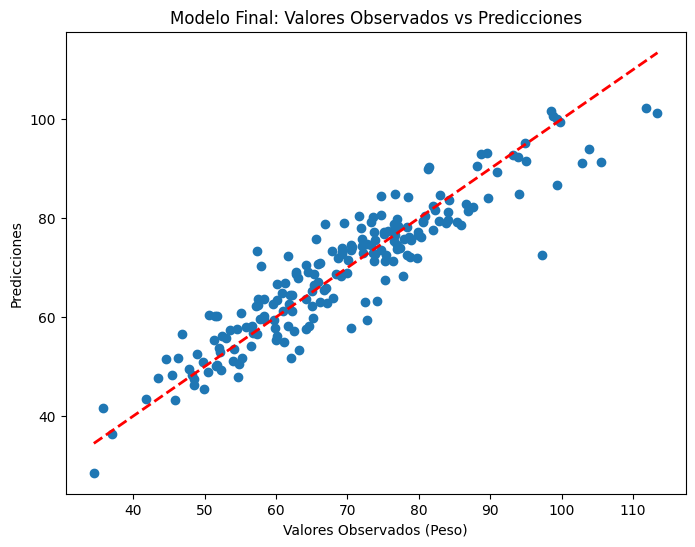

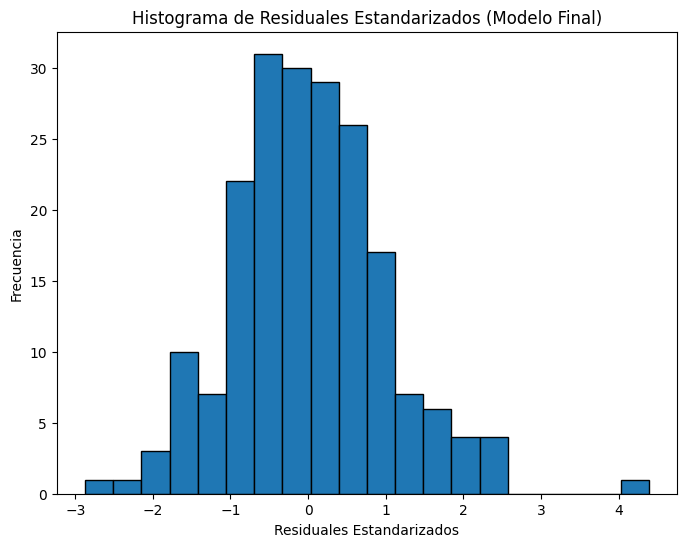

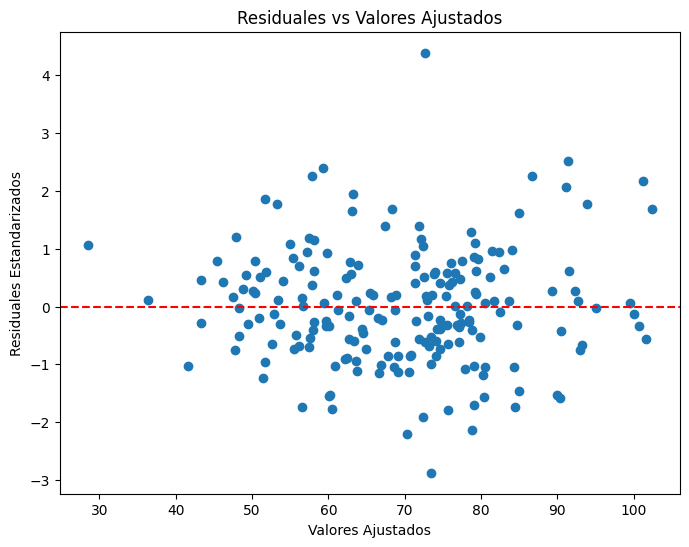

In [27]:
# Depuración del modelo completo, para solo dejar términos significativos
# Implementación de selección forward paso a paso

from itertools import combinations

# Variables disponibles
variables = ['talla', 'cintura', 'edad', 'sistol3', 'diastol3', 'sexo_2']

# Modelo nulo (solo intercepto)
print("Modelo nulo (solo intercepto):")
y_mean = y2.mean()
sst = np.sum((y2 - y_mean)**2)
aic_nulo = n2 * np.log(sst / n2) + 2 * 1
print(f"AIC: {aic_nulo}\n")

# Selección forward
variables_seleccionadas = []
variables_disponibles = variables.copy()

print("Proceso de selección forward:\n")

while variables_disponibles:
    mejor_aic = np.inf
    mejor_variable = None
    
    for var in variables_disponibles:
        vars_temp = variables_seleccionadas + [var]
        X_temp = Data2b[vars_temp]
        
        modelo_temp = LinearRegression()
        modelo_temp.fit(X_temp, y2)
        
        predicciones_temp = modelo_temp.predict(X_temp)
        residuos_temp = y2 - predicciones_temp
        sse_temp = np.sum(residuos_temp**2)
        
        k = len(vars_temp) + 1  # número de parámetros (incluye intercepto)
        aic_temp = n2 * np.log(sse_temp / n2) + 2 * k
        
        if aic_temp < mejor_aic:
            mejor_aic = aic_temp
            mejor_variable = var
            mejor_modelo = modelo_temp
            mejor_r2 = modelo_temp.score(X_temp, y2)
    
    if mejor_variable:
        variables_seleccionadas.append(mejor_variable)
        variables_disponibles.remove(mejor_variable)
        print(f"Paso {len(variables_seleccionadas)}: Se agrega '{mejor_variable}'")
        print(f"Variables en el modelo: {variables_seleccionadas}")
        print(f"AIC: {mejor_aic:.2f}")
        print(f"R²: {mejor_r2:.4f}\n")

# Modelo final seleccionado
print("\n" + "="*60)
print("Modelo final seleccionado:")
print(f"Variables: {variables_seleccionadas}")

X_final = Data2b[variables_seleccionadas]
ms = LinearRegression()
ms.fit(X_final, y2)

print(f"\nIntercepto: {ms.intercept_}")
for i, col in enumerate(variables_seleccionadas):
    print(f"{col}: {ms.coef_[i]}")

r2_final = ms.score(X_final, y2)
n_final = len(y2)
p_final = len(variables_seleccionadas)
r2_adj_final = 1 - (1 - r2_final) * (n_final - 1) / (n_final - p_final - 1)

print(f"\nR²: {r2_final}")
print(f"R² ajustado: {r2_adj_final}")

# Predicciones del modelo final
predicciones_final = ms.predict(X_final)

plt.figure(figsize=(8, 6))
plt.scatter(y2, predicciones_final)
plt.plot([y2.min(), y2.max()], [y2.min(), y2.max()], 'r--', lw=2)
plt.xlabel('Valores Observados (Peso)')
plt.ylabel('Predicciones')
plt.title('Modelo Final: Valores Observados vs Predicciones')
plt.show()

# Residuales del modelo final
residuos_final = y2 - predicciones_final
residuos_est_final = residuos_final / np.std(residuos_final, ddof=1)

plt.figure(figsize=(8, 6))
plt.hist(residuos_est_final, bins=20, edgecolor='black')
plt.xlabel('Residuales Estandarizados')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuales Estandarizados (Modelo Final)')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(predicciones_final, residuos_est_final)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales Estandarizados')
plt.title('Residuales vs Valores Ajustados')
plt.show()

Interpretar Qué ha pasado con la depuración del modelo, en qué orden entraron las variables, cuáles se eliminaron, cuál es la calidad final del modelo